In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading the trainning and the test sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Droping out unnecessary features: 'Name', 'Ticket' and 'Cabin'
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [7]:
# Parsing categorical features:
new_train = pd.get_dummies(train)
new_test = pd.get_dummies(test)
new_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [8]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [9]:
# Parsing null or nan values in the train set
new_train.isnull().sum().sort_values(ascending=False)

Age            177
Embarked_S       0
Embarked_Q       0
Embarked_C       0
Sex_male         0
Sex_female       0
Fare             0
Parch            0
SibSp            0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [10]:
# Filling out null values in the 'Age' columns with mean in the train set
new_train['Age'].fillna(new_train['Age'].mean(), inplace=True)
new_train.isnull().sum().sort_values(ascending=False)

Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Fare           0
Parch          0
SibSp          0
Age            0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [11]:
# Parsing null or nan values in the test set
new_test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Parch           0
SibSp           0
Pclass          0
PassengerId     0
dtype: int64

In [12]:
# Filling out null values in the 'Age' and 'Fare' columns with mean in the test set
new_test['Age'].fillna(new_test['Age'].mean(), inplace=True)
new_test['Fare'].fillna(new_test['Fare'].mean(), inplace=True)
new_test.isnull().sum().sort_values(ascending=False)

Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Fare           0
Parch          0
SibSp          0
Age            0
Pclass         0
PassengerId    0
dtype: int64

In [13]:
# Creating features and target to build the DecisionTreeModel
X = new_train.drop('Survived', axis=1)
y = new_train['Survived']

In [14]:
# Importing packages to build the model
from sklearn.tree import DecisionTreeClassifier

In [15]:
# building the model
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [16]:
# Score of our model in the trainning set
tree.score(X, y)

0.8271604938271605

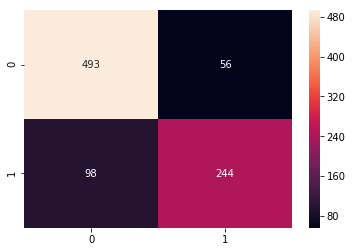

In [41]:
# Ploting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, tree.predict(X))

import seaborn as sns
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.heatmap(cm, ax=ax, annot=True, fmt='d');

In [67]:
# Predicting and preparing for submission
y_pred = tree.predict(new_test)
submission = pd.DataFrame()
submission['PassengerId'] = new_test['PassengerId']
submission['Survived'] = y_pred

In [68]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [69]:
submission.shape

(418, 2)

In [70]:
# Exporting to a csv file to submit in the kaggle
submission.to_csv('submission.csv', index=False)